In [1]:
import numpy as np
from sklearn import datasets
boston = datasets.load_boston()
X = boston.data
y = boston.target


In [2]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X)

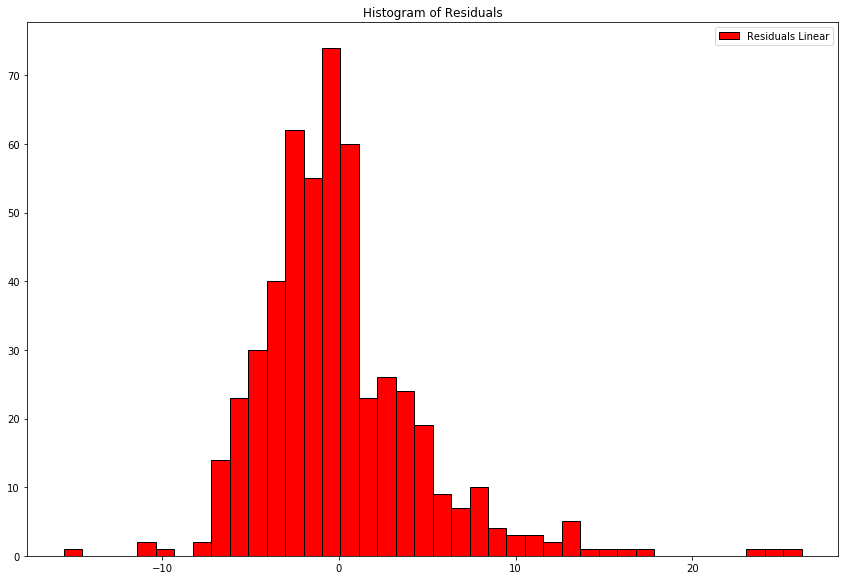

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
f.tight_layout()
ax.hist(y-predictions, color='red', edgecolor='black', label='Residuals Linear', bins = 40)
ax.set_title('Histogram of Residuals')
plt.legend(loc='best')

In [10]:
Residuals_mean = np.mean(y-predictions)
Residuals_mean

7.372231942174953e-15

((array([-2.99573567e+00, -2.71411028e+00, -2.55577619e+00, -2.44351800e+00,
         -2.35556494e+00, -2.28276382e+00, -2.22036495e+00, -2.16557440e+00,
         -2.11660431e+00, -2.07223893e+00, -2.03161265e+00, -1.99408648e+00,
         -1.95917475e+00, -1.92649942e+00, -1.89576017e+00, -1.86671438e+00,
         -1.83916307e+00, -1.81294098e+00, -1.78790928e+00, -1.76395019e+00,
         -1.74096288e+00, -1.71886034e+00, -1.69756695e+00, -1.67701655e+00,
         -1.65715093e+00, -1.63791855e+00, -1.61927361e+00, -1.60117517e+00,
         -1.58358651e+00, -1.56647453e+00, -1.54980933e+00, -1.53356377e+00,
         -1.51771316e+00, -1.50223493e+00, -1.48710847e+00, -1.47231481e+00,
         -1.45783653e+00, -1.44365756e+00, -1.42976302e+00, -1.41613915e+00,
         -1.40277318e+00, -1.38965322e+00, -1.37676820e+00, -1.36410778e+00,
         -1.35166231e+00, -1.33942275e+00, -1.32738062e+00, -1.31552796e+00,
         -1.30385728e+00, -1.29236155e+00, -1.28103411e+00, -1.26986869e+00,

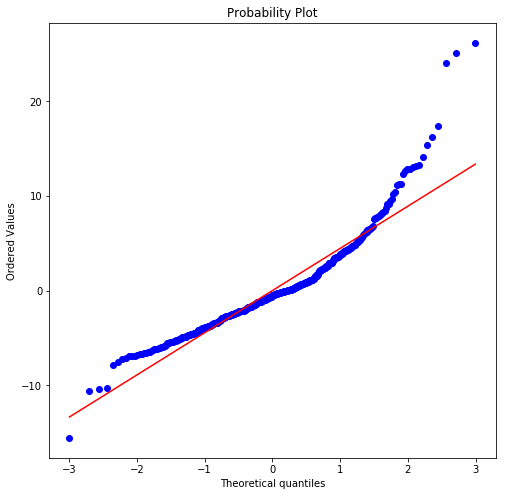

In [12]:
from scipy.stats import probplot
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
probplot(y-predictions, plot=ax)

In [13]:
mse = np.mean(np.power(y - predictions, 2))
mse

21.897779217687496

In [14]:
mad = np.mean(np.abs(y- predictions))
mad

3.272944637996926

Text(0.5,1,'Histogram of the lr.coef_[0]')

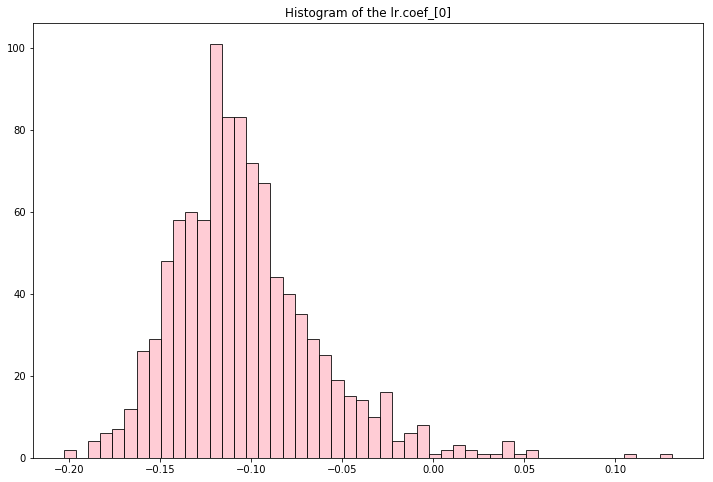

In [17]:
n_bootstraps = 1000
len_boston = len(y)
subsample_size = np.int(0.75*len_boston)
subsample = lambda : np.random.choice(np.arange(0,len_boston), size = subsample_size)
coefs = np.zeros(n_bootstraps)
for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = X[subsample_idx]
    subsample_y = y[subsample_idx]
    lr.fit(subsample_X,subsample_y)
    coefs[i] = lr.coef_[0]

f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
ax.hist(coefs, bins=50, color='pink', edgecolor='black', alpha=0.8)
ax.set_title('Histogram of the lr.coef_[0]')


In [18]:
np.percentile(coefs, [2.5, 97.5])

array([-0.16579849, -0.00654545])

In [20]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

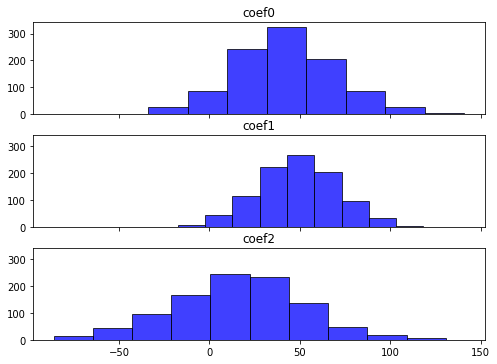

In [37]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
def fit_2_regression(lr):
    n_bootstraps = 1000
    len_reg = len(reg_target)
    coefs = np.ones((n_bootstraps, 3))
    subsamplr_size = np.int(0.75*len_reg)
    subsample = lambda : np.random.choice(np.arange(len_reg), size=subsample_size)
    for i in range(n_bootstraps):
        subsample_idx = subsample()
        subsample_X = reg_data[subsample_idx]
        subsample_y = reg_target[subsample_idx]
        lr.fit(subsample_X,subsample_y)
        coefs[i][0] = lr.coef_[0]
        coefs[i][1] = lr.coef_[1]
        coefs[i][2] = lr.coef_[2]
    %matplotlib inline
    import matplotlib.pyplot as plt
    f, axes = plt.subplots(nrows=3, sharey=True, sharex=True, figsize=(7, 5))
    f.tight_layout()

    for i,ax in enumerate(axes):
        ax.hist(coefs[:,i], color='b', edgecolor='black', alpha=0.75)
        ax.set_title('coef{}'.format(i))
    return coefs

coefs = fit_2_regression(lr)

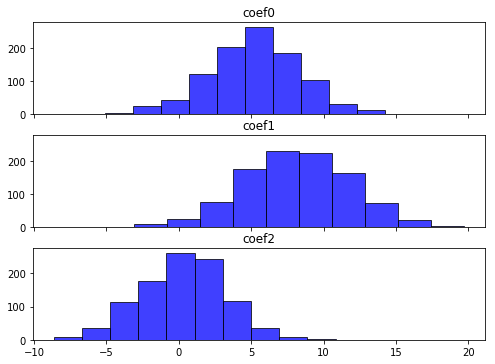

In [38]:
from sklearn.linear_model import Ridge
coefs_r = fit_2_regression(Ridge())

In [40]:
np.mean(coefs-coefs_r, axis=0)

array([36.8043504 , 40.89846544, 15.56809058])

In [42]:
np.var(coefs, axis=0)

array([ 778.69644482,  481.54588512, 1251.86031805])

In [43]:
np.var(coefs_r, axis=0)

array([ 9.85529281, 13.25431067,  8.3996235 ])

In [47]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=100, n_features = 2, effective_rank=1, noise=10)

In [48]:
import numpy as np
from sklearn .linear_model import RidgeCV
rcv = RidgeCV(alphas=np.array([0.1, 0.2, 0.3, 0.4]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [49]:
rcv.alpha_

0.1

In [50]:
rcv = RidgeCV(alphas=np.array([.08, .09, .1, .11, .12]))
rcv.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.08, 0.09, 0.1 , 0.11, 0.12]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [57]:
rcv.alpha_

0.08

In [61]:
alphas_to_test = np.linspace(0.0001, 0.1)
rcv3 = RidgeCV(alphas=alphas_to_test, store_cv_values=True)
rcv3.fit(reg_data, reg_target)

RidgeCV(alphas=array([0.0001 , 0.00214, 0.00418, 0.00622, 0.00826, 0.01029, 0.01233,
       0.01437, 0.01641, 0.01845, 0.02049, 0.02253, 0.02457, 0.0266 ,
       0.02864, 0.03068, 0.03272, 0.03476, 0.0368 , 0.03884, 0.04088,
       0.04291, 0.04495, 0.04699, 0.04903, 0.05107, 0.05311, 0.05515,
       0.0571...165, 0.08369,
       0.08573, 0.08777, 0.08981, 0.09184, 0.09388, 0.09592, 0.09796,
       0.1    ]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [62]:
rcv3.cv_values_.shape


(100, 50)

In [63]:
smallest_idx = rcv3.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.049030612244897964

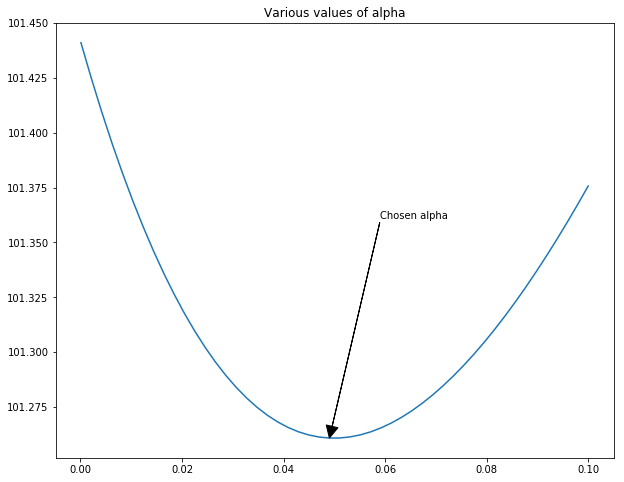

In [66]:
%matplotlib inline
f = plt.figure(figsize=(10,8))
ax = f.add_subplot(111)
ax.set_title('Various values of alpha')
xy = (alphas_to_test[smallest_idx], rcv3.cv_values_.mean(axis=0)[smallest_idx])
xytext = (xy[0] + 0.01, xy[1] + 0.1)
ax.annotate('Chosen alpha', xy=xy, xytext=xytext, arrowprops=dict(facecolor='black', shrink=0, width=0))
ax.plot(alphas_to_test, rcv3.cv_values_.mean(axis=0));

In [68]:
def MAD(target, prediction):
    absolute_deviation = np.abs(target - prediction)
    return absolute_deviation.mean()

import sklearn
MAD = sklearn.metrics.make_scorer(MAD, greater_is_better=False)
rcv4 = RidgeCV(alphas=alphas_to_test, store_cv_values=True, scoring=MAD)
rcv4.fit(reg_data, reg_target)
smallest_idx = rcv4.cv_values_.mean(axis=0).argmin()
alphas_to_test[smallest_idx]

0.0001

In [2]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200, n_features=500, n_informative=5, noise=5)

In [3]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(reg_data, reg_target)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [11]:
import numpy as np
np.sum(lasso.coef_ != 0)


7

In [13]:
lasso_0 = Lasso(0)
lasso_0.fit(reg_data, reg_target)
np.sum(lasso_0.coef_ != 0)

D:\Users\13884\lib\site-packages\ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
D:\Users\13884\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


500

In [15]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV()
lassocv.fit(reg_data, reg_target)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [16]:
lassocv.alpha_

0.8137441935247824

In [19]:
lassocv.coef_[:20]

array([-0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.02466209,  0.        , -0.        , -0.00240149, -0.        ,
       -0.        , -0.        ,  0.        , -0.        ,  0.        ])

In [21]:
np.sum(lassocv.coef_ != 0)

17

In [27]:
mask = lassocv.coef_ != 0
new_reg_data = reg_data[:, mask]
new_reg_data.shape

(200, 17)

In [29]:
import numpy as np
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=200,n_features=500, n_informative=10, noise=2)

In [39]:
from sklearn.linear_model import Lars
lars = Lars(n_nonzero_coefs=10)
lars.fit(reg_data, reg_target)

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=10, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [40]:

np.sum(lars.coef_ != 0)

10

In [41]:
train_n = 100
lars_12 = Lars(n_nonzero_coefs=12)
lars_12.fit(reg_data[:train_n], reg_target[:train_n])



Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=12, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [42]:
lars_0 = Lars()
lars_0.fit(reg_data[:train_n], reg_target[:train_n])

Lars(copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=500, normalize=True, positive=False,
   precompute='auto', verbose=False)

In [43]:
print(np.mean(np.power(reg_target[train_n:] - lars.predict(reg_data[train_n:]), 2)))
print(np.mean(np.power(reg_target[train_n:] - lars_12.predict(reg_data[train_n:]), 2)))
print(np.mean(np.power(reg_target[train_n:] - lars_0.predict(reg_data[train_n:]), 2)))

7.852788519608829
20.338630115525767
1.5244682745094507e+28


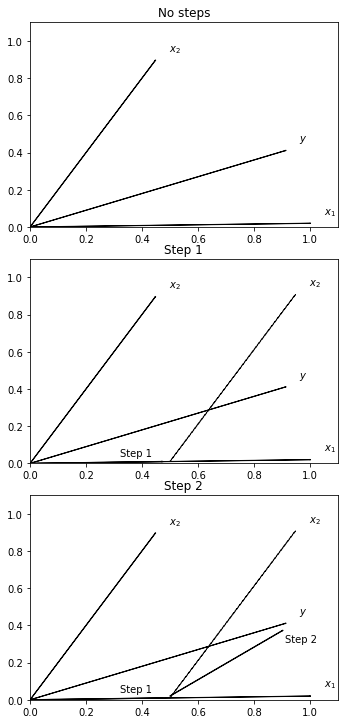

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
def unit(*args):
    squared = map(lambda x: x**2, args)
    distance = sum(squared) ** (.5)
    return map(lambda x: x / distance, args)
f, ax = plt.subplots(nrows=3, figsize=(5, 10))
plt.tight_layout()
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(0, 1.1)
x, y = unit(1, 0.02)
ax[0].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[0].text(x + .05, y + .05, r"$x_1$")
x, y = unit(.5, 1)
ax[0].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[0].text(x + .05, y + .05, r"$x_2$")
x, y = unit(1, .45)
ax[0].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[0].text(x + .05, y + .05, r"$y$")
ax[0].set_title("No steps")
# step 1
ax[1].set_title("Step 1")
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(0, 1.1)
x, y = unit(1, 0.02)
ax[1].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[1].text(x + .05, y + .05, r"$x_1$")
x, y = unit(.5, 1)
ax[1].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[1].text(x + .05, y + .05, r"$x_2$")
x, y = unit(.5, 1)
ax[1].arrow(.5, 0.01, x, y, ls='dashed', edgecolor='black', facecolor='black')
ax[1].text(x + .5 + .05, y + .01 + .05, r"$x_2$")
ax[1].arrow(0, 0, .47, .01, width=.0015, edgecolor='black', facecolor='black')
ax[1].text(.47-.15, .01 + .03, "Step 1")
x, y = unit(1, .45)
ax[1].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[1].text(x + .05, y + .05, r"$y$")
# step 2
ax[2].set_title("Step 2")
ax[2].set_ylim(0, 1.1)
ax[2].set_xlim(0, 1.1)
x, y = unit(1, 0.02)
ax[2].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[2].text(x + .05, y + .05, r"$x_1$")
x, y = unit(.5, 1)
ax[2].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[2].text(x + .05, y + .05, r"$x_2$")
x, y = unit(.5, 1)
ax[2].arrow(.5, 0.01, x, y, ls='dashed', edgecolor='black', facecolor='black')
ax[2].text(x + .5 + .05, y + .01 + .05, r"$x_2$")
ax[2].arrow(0, 0, .47, .01, width=.0015, edgecolor='black', facecolor='black')
ax[2].text(.47-.15, .01 + .03, "Step 1")
## step 2
x, y = unit(1, .45)
ax[2].arrow(.5, .02, .4, .35, width=.0015, edgecolor='black', facecolor='black')
ax[2].text(x, y - .1, "Step 2")
x, y = unit(1, .45)
ax[2].arrow(0, 0, x, y, edgecolor='black', facecolor='black')
ax[2].text(x + .05, y + .05, r"$y$");

In [47]:
from sklearn.linear_model import LarsCV
lcv = LarsCV()
lcv.fit(reg_data, reg_target)

LarsCV(copy_X=True, cv=None, eps=2.220446049250313e-16, fit_intercept=True,
    max_iter=500, max_n_alphas=1000, n_jobs=1, normalize=True,
    positive=False, precompute='auto', verbose=False)

In [48]:
np.sum(lcv.coef_ !=0 )

18

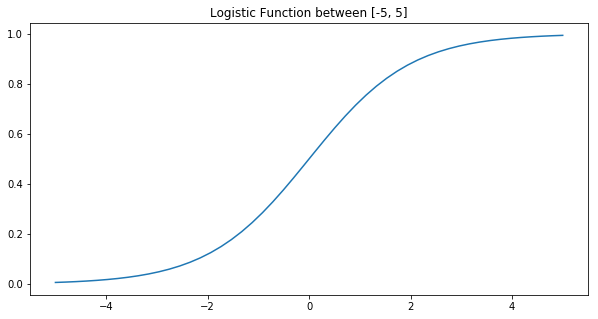

In [54]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 5))
rng = np.linspace(-5, 5)
log_f = np.apply_along_axis(lambda x:1 / (1 + np.exp(-x)), 0, rng)
ax.set_title("Logistic Function between [-5, 5]")
ax.plot(rng, log_f)

In [59]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 1000, n_features = 4)

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]
lr.fit(X_train, y_train)
y_train_predictions = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.89375
0.875


In [64]:
(y_train_predictions == y_train).sum().astype(float)/y_train.shape[0]

0.89375

In [66]:
(y_test_predictions == y_test).sum().astype(float)/y_test.shape[0]

0.875

In [67]:
X, y = make_classification(n_samples=5000, n_features=4, weights=[.95])
sum(y) / (len(y)*1.)

0.0546

In [68]:
X_train = X[:-500]
X_test = X[-500:]
y_train = y[:-500]
y_test = y[-500:]
lr.fit(X_train, y_train)
y_train_predictions = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9584444444444444
0.944


In [72]:
(y_test[y_test==1] == y_test_predictions[y_test==1]).sum().astype(float) / y_test[y_test==1].shape[0]

0.28125

In [80]:
lr = LogisticRegression(class_weight={0: .15, 1: .85})
lr.fit(X_train, y_train)
y_train_predictions = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9253333333333333
0.916


In [77]:
(y_test[y_test==1] == y_test_predictions[y_test==1]).sum().astype(float) / y_test[y_test==1].shape[0]

0.75

In [79]:
(y_test_predictions == y_test).sum().astype(float) / y_test.shape[0]

0.916

In [1]:
from sklearn.datasets import  make_regression
reg_data, reg_target = make_regression(n_samples=1000, n_features=10, n_informative=2, noise=2)

In [2]:
from sklearn.linear_model import BayesianRidge
bridge = BayesianRidge()
bridge.fit(reg_data,reg_target)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [3]:
bridge.coef_

array([ 1.51580614e-02, -3.66990424e-02,  2.70108595e+01,  3.02878659e-03,
        2.00807626e-02,  9.98410779e-02, -1.02210638e-01, -6.05523277e-02,
        2.20670272e-02,  5.82245340e+01])

In [5]:
br_alphas = BayesianRidge(alpha_1=10, lambda_1=10)
br_alphas.fit(reg_data, reg_target)
br_alphas.coef_

array([ 1.51656725e-02, -3.67266306e-02,  2.70102889e+01,  3.02682383e-03,
        2.01087726e-02,  9.98552788e-02, -1.02165947e-01, -6.05703084e-02,
        2.19824368e-02,  5.82234333e+01])

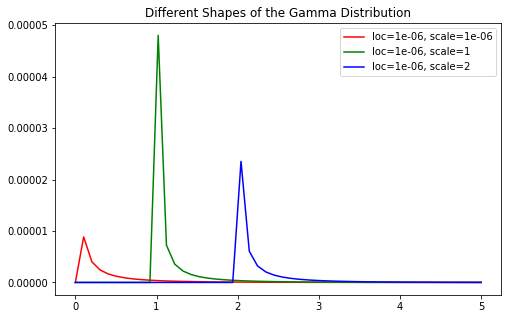

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gamma
import numpy as np
form = lambda x,y : "loc={}, scale={}".format(x, y)
g = lambda x, y=1e-06, z=1e-06: gamma.pdf(x, y, z)
g2 = lambda x, y=1e-06, z=1: gamma.pdf(x, y, z)
g3 = lambda x, y=1e-06, z=2: gamma.pdf(x, y, z)
rng = np.linspace(0, 5)
f, ax = plt.subplots(figsize=(8,5))
ax.plot(rng, list(map(g, rng)), label=form(1e-06, 1e-06), color='r')
ax.plot(rng, list(map(g2, rng)), label=form(1e-06, 1), color='g')
ax.plot(rng, list(map(g3, rng)), label=form(1e-06, 2), color='b')
ax.set_title("Different Shapes of the Gamma Distribution")
ax.legend()

Text(0.5,1,'Example of Double Exponential Distribution')

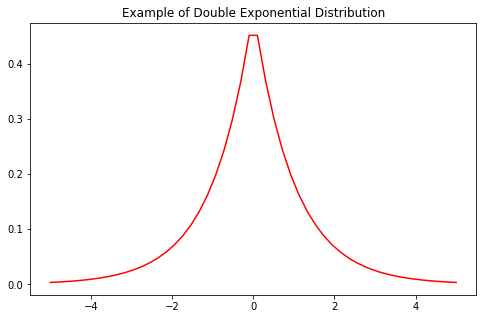

In [7]:
from scipy.stats import laplace
form = lambda x,y: "loc={}, scale={}".format(x, y)
g = lambda x : laplace.pdf(x)
f, ax = plt.subplots(figsize=(8,5))
rng = np.linspace(-5,5)
ax.plot(rng, list(map(g,rng)), color='r')
ax.set_title("Example of Double Exponential Distribution")

In [9]:
import numpy as np
from sklearn.datasets import make_regression
X, y = make_regression(1000, 2, noise=10)

In [24]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
gbr = GBR()
gbr.fit(X,y)
gbr_preds = gbr.predict(X)
#gbr.score(X,y)

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
lr_preds = lr.predict(X)

In [26]:
gbr_residuals = y- gbr_preds
lr_residuals = y-lr_preds

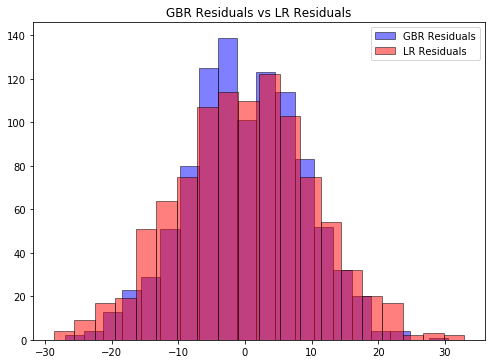

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
ax.hist( gbr_residuals, bins=20, color='b', edgecolor='black', label='GBR Residuals', alpha=0.5)
ax.hist( lr_residuals, bins=20, color='r', edgecolor='black', label='LR Residuals', alpha=0.5)
ax.set_title('GBR Residuals vs LR Residuals')
ax.legend(loc='best')


In [30]:
np.percentile(gbr_residuals, [2.5, 97.5])

array([-17.36402489,  16.71999189])

In [31]:
np.percentile(lr_residuals, [2.5, 97.5])

array([-20.28191823,  20.19079425])

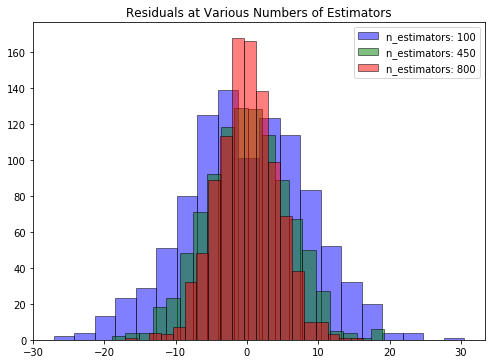

In [37]:
n_estimators = np.arange(100, 1100, 350)
gbrs = [GBR(n_estimators=n_estimator) for n_estimator in n_estimators]
residuals = {}
for i,gbr in enumerate(gbrs):
    gbr.fit(X,y)
    residuals[gbr.n_estimators] = y - gbr.predict(X)
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
colors = {800:'r', 450:'g', 100:'b'}
for k,v in residuals.items():
    ax.hist(v, bins=20, edgecolor='black', alpha=0.5, label='n_estimators: %d' % k, color=colors[k])
ax.set_title("Residuals at Various Numbers of Estimators")
ax.legend(loc='best')
    
